<a href="https://colab.research.google.com/github/dibesmab-cyber/d/blob/main/Untitlead1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install pandas matplotlib seaborn

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("/content/500veri.csv")

In [ ]:
import pandas as pd

# Dosyayı farklı bir encoding ile oku (ör: ISO-8859-9 ya da Windows-1254 olabilir)
df = pd.read_csv("/content/ABC.csv", encoding="Windows-1254")  # Kodlamayı gerekirse değiştir

# UTF-8 olarak kaydet
df.to_csv("dson.csv", index=False, encoding="utf-8")

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9e in position 118: character maps to <undefined>

In [ ]:
import pandas as pd
import chardet

# 1. Dosya yolu
file_path = "/content/ABC.csv"

# 2. Encoding tespiti
with open(file_path, "rb") as f:
    result = chardet.detect(f.read())
encoding = result["encoding"]
print(f"Tespit edilen encoding: {encoding}")

# 3. Dosyayı doğru encoding ile oku
df = pd.read_csv(file_path, encoding=encoding, on_bad_lines='skip')

# 4. İlk 5 satırı göster
print(df.head())

# 5. İstersen UTF-8 olarak kaydet
df.to_csv("/content/denew.csv", index=False, encoding="utf-8")
print("Dosya UTF-8 olarak kaydedildi: denemeveri_utf8.csv")

Tespit edilen encoding: Windows-1254


UnicodeDecodeError: 'charmap' codec can't decode byte 0x9e in position 118: character maps to <undefined>

In [ ]:
import pandas as pd
import re

df = pd.read_csv("/content/Kitap3 - Kitap3.csv")

def duration_to_seconds(duration):
    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', duration)
    if not match:
        return None
    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    seconds = int(match.group(3)) if match.group(3) else 0
    return hours * 3600 + minutes * 60 + seconds

df["Video_Süresi_Saniye"] = df["Video Süresi"].apply(duration_to_seconds)


df.to_csv("diyanet_yorumlar_guncel.csv", index=False) #yeni csvye kaydet

print(df[["Video Süresi", "Video_Süresi_Saniye"]].head())


  Video Süresi  Video_Süresi_Saniye
0        PT26S                   26
1        PT26S                   26
2        PT26S                   26
3        PT26S                   26
4        PT26S                   26


In [ ]:
df = pd.read_csv("/content/ABC.csv")

In [23]:

print("Tekrarlayan satır sayısı", df.duplicated().sum())


Tekrarlayan satır sayısı 0


In [24]:
# veriyle ilgili temel incelemeler
#
print("🔹 Veri Boyutu:", df.shape)
print("\n🔹 İlk 5 Satır:")
print(df.head()) #direkt df.head(5) de olur genel yapıyı görmek/kontrol etmek için

print("\n🔹 Veri Hakkında Bilgi:")
print(df.info())

print("\n🔹 Eksik Değerler:")
print(df.isnull().sum())

print("\n🔹 Temel İstatistikler:")
print(df.describe()) #sayısal sutunlar icin
df.describe(include='object') #kategorik sutunlar icin

🔹 Veri Boyutu: (516, 3)

🔹 İlk 5 Satır:
   Duygu         Yorum Yapan  \
0      1  @sezginsenucar9897   
1      1        @alieralp798   
2      1  @ufukdikilitas9297   
3      1             @mdnmzz   
4      1         @odin_fatih   

                                               Yorum  
0  DERHAL  GEREKEN YAPILSIN YA   YETER ARTIK ÜLKE...  
1  Başlayan soruşturma Ali Erbaş tan başlatılması...  
2            Boşuna uğraşmayın, onlara bi şey olmaz!  
3                                 Akharamiler istifa  
4  Vergiden kaçınmadır, vergi kaçırma değil nasıl...  

🔹 Veri Hakkında Bilgi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Duygu        516 non-null    int64 
 1   Yorum Yapan  516 non-null    object
 2   Yorum        516 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.2+ KB
None

🔹 Eksik Değerler:
Duygu          0
Yorum Yapan 

,Yorum Yapan,Yorum
count,516,516
unique,489,514
top,@ilkbahar9_9_9,Diyanet kapatılsın
freq,4,2


In [25]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} benzersiz değer")

Duygu: 3 benzersiz değer
Yorum Yapan: 489 benzersiz değer
Yorum: 514 benzersiz değer


In [26]:
numeric_cols = [col for col in df.columns if df[col].dtype == 'int']
for col in numeric_cols:
    print(f"\n{col} dağılımı:")
    print(df[col].value_counts().head(10))


Duygu dağılımı:
Duygu
1    269
3    207
2     40
Name: count, dtype: int64


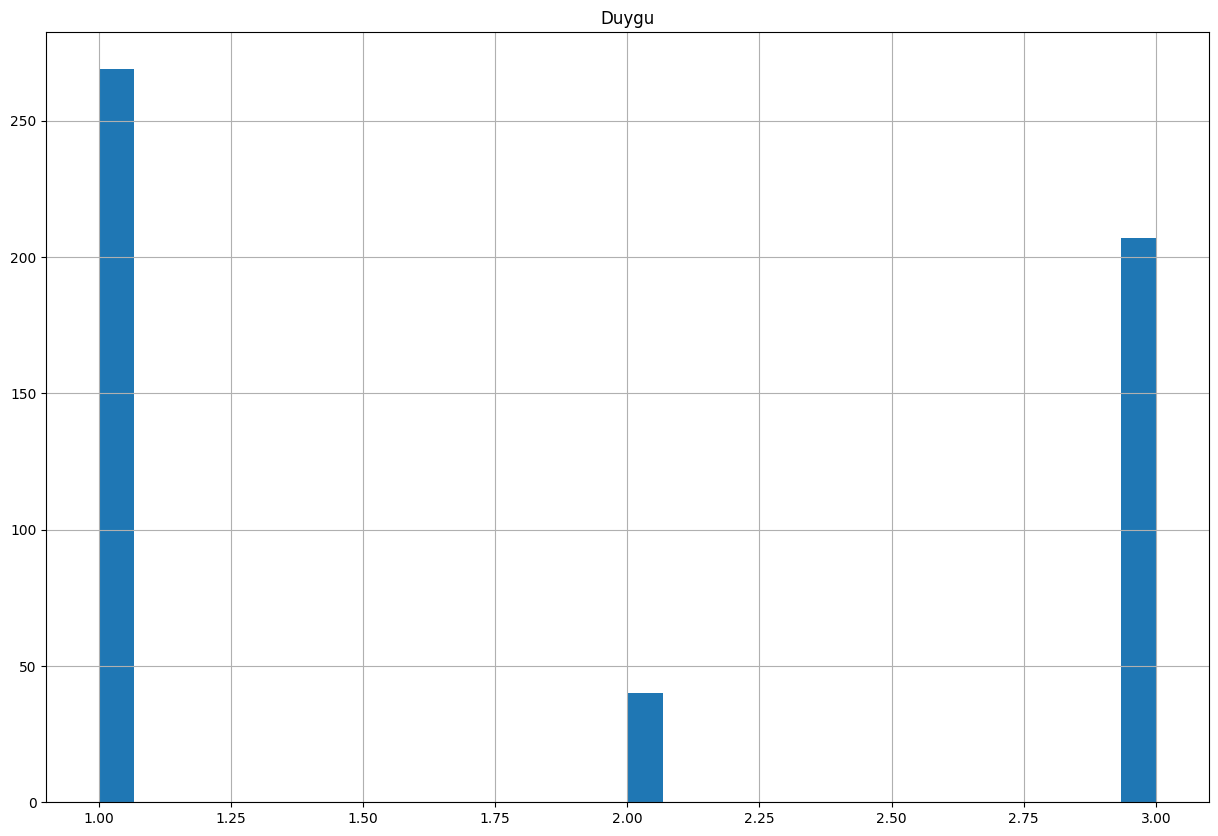

In [27]:

df.hist(figsize=(15, 10), bins=30)
plt.show()

In [28]:
df['Beğeni Sayısı'].hist(bins=15, figsize=(10,6))
plt.xlabel("Beğeni Sayısı")
plt.ylabel("Video Sayısı")
plt.title("video-beğeni sayısı dağılımı")
plt.show()

KeyError: 'Beğeni Sayısı'

<Axes: >

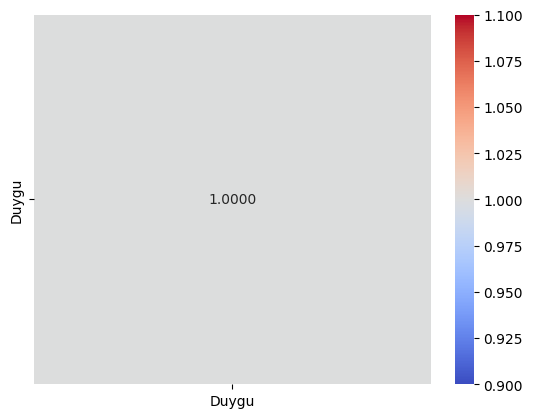

In [ ]:
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,           #üstüne sayısal deger yazmak
    fmt=".4f",            # ondalık
    cmap="coolwarm",
    cbar=True             # Sağdaki renk skalası
)

In [ ]:
# Numerik kolonları seç

# Skewness ve Kurtosis hesapla
skewness = df[numeric_cols].skew()
kurtosis = df[numeric_cols].kurtosis()

#sonuclar
skew_kurt_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
print("📊 Skewness ve Kurtosis:")
print(skew_kurt_df)

#skewness çarpıklık 0a yakın normal, pozitif sağ çarpık, negatif sol çarpık
#kurtosis basıklık 0 normale yakın, >0 sivri, <0 basık dağılım

📊 Skewness ve Kurtosis:
                     Skewness   Kurtosis
Duygu                0.000000  -1.525862
Beğeni Sayısı        1.770802   1.533715
Yanıt Sayısı         7.141368  53.246283
Görüntülenme Sayısı  2.534781   7.755945
Video_Süresi_Saniye  3.912678  20.162454


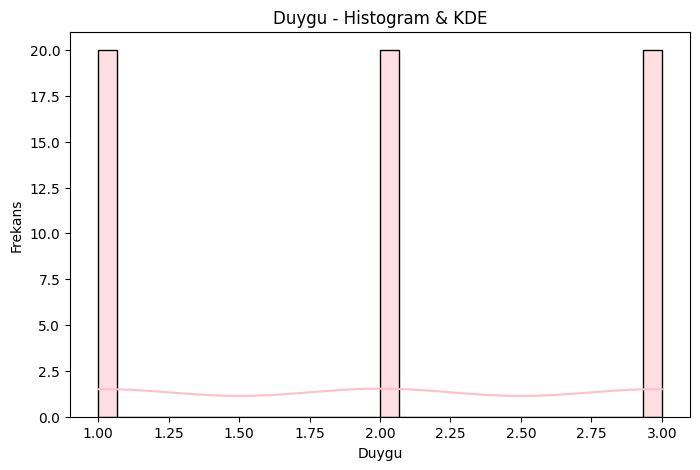

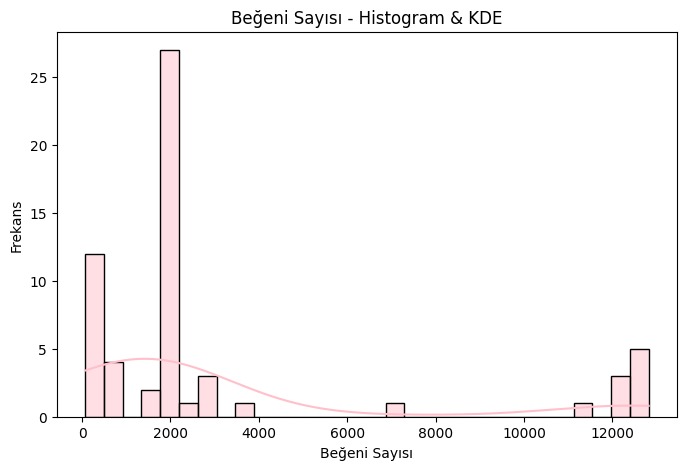

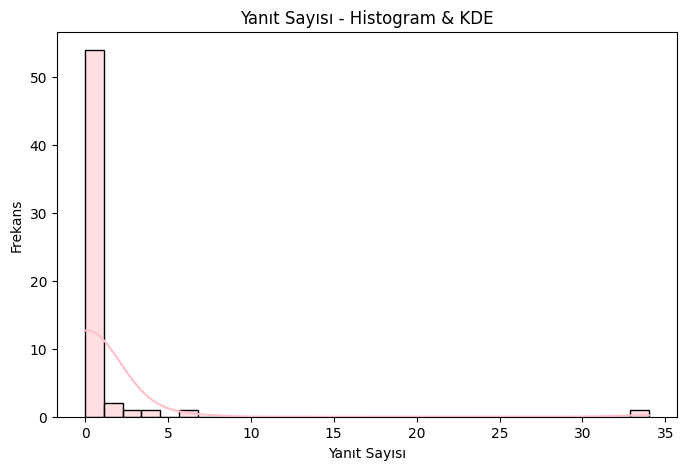

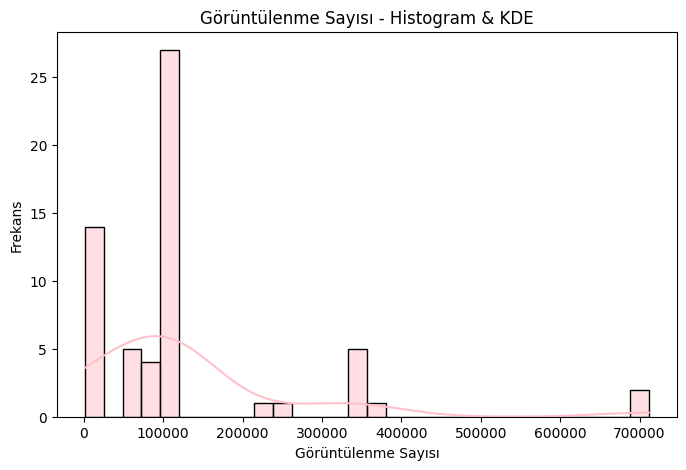

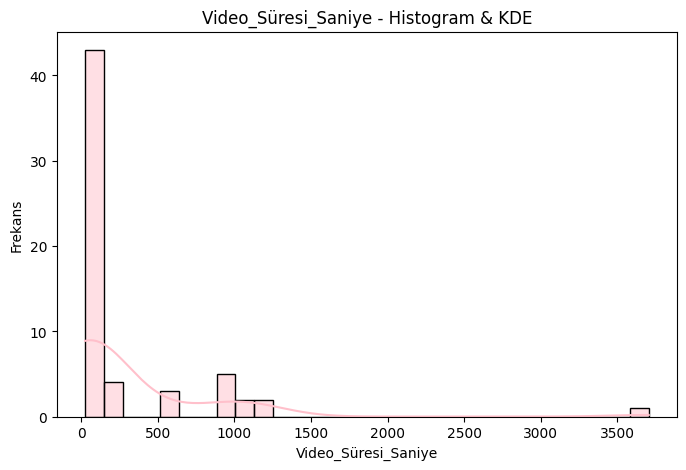

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, color="pink", bins=30)  # kernel density estimate
    plt.title(f"{col} - Histogram & KDE")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# CSV'den veriyi oku
# kendi dosyanın adını buraya yaz (ör: "yorumlar.csv")
df = pd.read_csv("/content/diyanet_yorumlar_guncel.csv")

# Sadece gerekli sütunları al
df = df[['Yorum', 'Duygu']] # buraya temiz yorum sutunu gelecek

# Eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(
    df['Yorum'], df['Duygu'], test_size=0.2, random_state=42
)

# TF-IDF vektörleştirme
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression modeli
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Tahminler
y_pred = model.predict(X_test_vec)

# Sonuçlar
print("Sınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred, target_names=["Negatif", "Notr", "Pozitif"]))

print("Karmaşıklık Matrisi:\n")
print(confusion_matrix(y_test, y_pred))

Sınıflandırma Raporu:

              precision    recall  f1-score   support

     Negatif       1.00      0.25      0.40         4
        Notr       0.22      1.00      0.36         2
     Pozitif       1.00      0.33      0.50         6

    accuracy                           0.42        12
   macro avg       0.74      0.53      0.42        12
weighted avg       0.87      0.42      0.44        12

Karmaşıklık Matrisi:

[[1 3 0]
 [0 2 0]
 [0 4 2]]


In [29]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords

# İlk kez çalıştırıyorsan uncomment et:
nltk.download('stopwords')

turkish_stopwords = set(stopwords.words('turkish'))

def clean_text(text):
    if pd.isnull(text):
        return ""

    # Küçük harfe çevir
    text = text.lower()

    # Emoji ve özel karakterleri kaldır
    text = re.sub(r'[^\w\sçğıöşü]', ' ', text)

    # Sayıları kaldır
    text = re.sub(r'\d+', '', text)

    # Noktalama işaretlerini kaldır
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Stopwords temizleme
    text = ' '.join([word for word in text.split() if word not in turkish_stopwords])

    # Fazla boşlukları düzenleme
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# CSV'yi oku
df = pd.read_csv("/content/500veri.csv")

# Temizlenmiş yorumları yeni bir sütuna ekle
df["Temiz_Yorum"] = df["Yorum"].apply(clean_text)

# Aynı dosyaya (üzerine yazarak) kaydet
df.to_csv("veriler_temiz.csv", index=False)

print("✅ Temizlenmiş yorumlar 'veriler_temiz.csv' dosyasına kaydedildi!")


✅ Temizlenmiş yorumlar 'veriler_temiz.csv' dosyasına kaydedildi!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# CSV'den veriyi oku
# kendi dosyanın adını buraya yaz (ör: "yorumlar.csv")
df = pd.read_csv("/content/veriler_temiz.csv")

# Sadece gerekli sütunları al
df = df[['Yorum', 'Duygu']] # buraya temiz yorum sutunu gelecek

# Eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(
    df['Yorum'], df['Duygu'], test_size=0.2, random_state=42
)

# TF-IDF vektörleştirme
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression modeli
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Tahminler
y_pred = model.predict(X_test_vec)

# Sonuçlar
print("Sınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred, target_names=["Negatif", "Notr", "Pozitif"]))

print("Karmaşıklık Matrisi:\n")
print(confusion_matrix(y_test, y_pred))

Sınıflandırma Raporu:

              precision    recall  f1-score   support

     Negatif       0.78      0.93      0.85        58
        Notr       0.00      0.00      0.00         8
     Pozitif       0.89      0.82      0.85        38

    accuracy                           0.82       104
   macro avg       0.56      0.58      0.57       104
weighted avg       0.76      0.82      0.78       104

Karmaşıklık Matrisi:

[[54  0  4]
 [ 8  0  0]
 [ 7  0 31]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
# Gerekli kütüphaneler
!pip install nlpaug transformers sentencepiece pandas

import pandas as pd
import nlpaug.augmenter.word as naw

# 1️⃣ CSV dosyasını oku
df = pd.read_csv("/content/veriler_temiz.csv")  # Dosya adını kendine göre değiştir

# 2️⃣ Nötr sınıfı ayır (Duygu = 2)
neutral_df = df[df['Duygu'] == 2]
neutral_texts = neutral_df['Yorum'].tolist()

# 3️⃣ Augmentation hazırlığı (contextual word embeddings)
aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-multilingual-cased',  # Türkçe destekli
    action="substitute"
)

# 4️⃣ Augmentation uygula
augmented_texts = []
for text in neutral_texts:
    augmented = aug.augment(text, n=3)  # Her nötr cümleden 3 yeni varyasyon
    augmented_texts.extend(augmented)

# 5️⃣ Augmented veriyi DataFrame olarak hazırla
aug_df = pd.DataFrame({
    "Duygu": [2]*len(augmented_texts),
    "Yorum Yapan": ["Augmented"]*len(augmented_texts),  # Yeni veri için placeholder
    "Yorum": augmented_texts
})

# 6️⃣ Orijinal veri ile birleştir
new_df = pd.concat([df, aug_df], ignore_index=True)

# 7️⃣ Yeni CSV'yi kaydet
new_df.to_csv("dataset_augmented.csv", index=False, encoding="utf-8-sig")

print("Augmentation tamamlandı! Yeni CSV 'dataset_augmented.csv' olarak kaydedildi.")
print(f"Orijinal nötr cümle sayısı: {len(neutral_texts)}")
print(f"Augmented nötr cümle sayısı: {len(augmented_texts)}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 9.6 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Augmentation tamamlandı! Yeni CSV 'dataset_augmented.csv' olarak kaydedildi.
Orijinal nötr cümle sayısı: 40
Augmented nötr cümle sayısı: 120


In [34]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords

# İlk kez çalıştırıyorsan uncomment et:
nltk.download('stopwords')

turkish_stopwords = set(stopwords.words('turkish'))

def clean_text(text):
    if pd.isnull(text):
        return ""

    # Küçük harfe çevir
    text = text.lower()

    # Emoji ve özel karakterleri kaldır
    text = re.sub(r'[^\w\sçğıöşü]', ' ', text)

    # Sayıları kaldır
    text = re.sub(r'\d+', '', text)

    # Noktalama işaretlerini kaldır
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Stopwords temizleme
    text = ' '.join([word for word in text.split() if word not in turkish_stopwords])

    # Fazla boşlukları düzenleme
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# CSV'yi oku
df = pd.read_csv("/content/dataset_augmented.csv")

# Temizlenmiş yorumları yeni bir sütuna ekle
df["Temiz_Yorum"] = df["Yorum"].apply(clean_text)

# Aynı dosyaya (üzerine yazarak) kaydet
df.to_csv("augmented500.csv", index=False)

print("✅ Temizlenmiş yorumlar 'augmented500' dosyasına kaydedildi!")


✅ Temizlenmiş yorumlar 'augmented500' dosyasına kaydedildi!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# CSV'den veriyi oku
# kendi dosyanın adını buraya yaz (ör: "yorumlar.csv")
df = pd.read_csv("/content/augmented500.csv")

# Sadece gerekli sütunları al
df = df[['Yorum', 'Duygu']] # buraya temiz yorum sutunu gelecek

# Eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(
    df['Yorum'], df['Duygu'], test_size=0.2, random_state=42
)

# TF-IDF vektörleştirme
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression modeli
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Tahminler
y_pred = model.predict(X_test_vec)

# Sonuçlar
print("Sınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred, target_names=["Negatif", "Notr", "Pozitif"]))

print("Karmaşıklık Matrisi:\n")
print(confusion_matrix(y_test, y_pred))

Sınıflandırma Raporu:

              precision    recall  f1-score   support

     Negatif       0.70      0.94      0.80        49
        Notr       0.89      0.65      0.75        37
     Pozitif       0.91      0.76      0.83        42

    accuracy                           0.80       128
   macro avg       0.83      0.78      0.79       128
weighted avg       0.82      0.80      0.80       128

Karmaşıklık Matrisi:

[[46  2  1]
 [11 24  2]
 [ 9  1 32]]
